In [1]:
import pandas as pd
df=pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [2]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.describe(include="O")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


## ENCODING---USED CHANGE TEXT TO NUMERICAL

In [7]:
data = pd.get_dummies(df.Sex,prefix='Gender',drop_first=True)
df=pd.concat([data,df],axis=1)
df.drop(columns="Sex",inplace=True)

In [8]:
data=pd.get_dummies(df.ChestPainType, prefix='ChestPain',drop_first=True)
df=pd.concat([data,df],axis=1)
df.drop(columns="ChestPainType",inplace=True)

In [10]:
data=pd.get_dummies(df.RestingECG, prefix='RestingECG',drop_first=True)
df=pd.concat([data,df],axis=1)
df.drop(columns="RestingECG",inplace=True)

In [15]:

data=pd.get_dummies(df.ExerciseAngina, prefix='ExerciseAngina',drop_first=True)
df=pd.concat([data,df],axis=1)
df.drop(columns="ExerciseAngina",inplace=True)

In [20]:
data=pd.get_dummies(df.ST_Slope, prefix='ST_Slope',drop_first=True)
df=pd.concat([data,df],axis=1)
df.drop(columns="ST_Slope",inplace=True)

In [22]:
df

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,40,140,289,0,172,0.0,0
1,True,False,False,True,False,False,True,False,False,49,160,180,0,156,1.0,1
2,False,True,False,False,True,True,False,False,True,37,130,283,0,98,0.0,0
3,True,False,True,True,False,False,False,False,False,48,138,214,0,108,1.5,1
4,False,True,False,True,False,False,True,False,True,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,45,110,264,0,132,1.2,1
914,True,False,False,True,False,False,False,False,True,68,144,193,1,141,3.4,1
915,True,False,True,True,False,False,False,False,True,57,130,131,0,115,1.2,1
916,True,False,False,False,False,True,False,False,False,57,130,236,0,174,0.0,1


## OUTLIER HANDLING --- to remove unusual data point , data>LB AND data<UB

## Age

In [26]:
from scipy import stats
stats.iqr(df.Age)

13.0

In [27]:
IQR_Age=stats.iqr(df.Age)

In [28]:
import numpy as np

In [32]:
Q1_Age = np.percentile(df.Age,25)
Q3_Age = np.percentile(df.Age,75)
print(Q1_Age)
print(Q3_Age)

47.0
60.0


In [34]:
Q1_Age - 1.5*(IQR_Age)

27.5

In [36]:
Q3_Age + 1.5*(IQR_Age)

79.5

In [38]:
LB_Age=Q1_Age - 1.5*(IQR_Age)
UB_Age=Q3_Age + 1.5*(IQR_Age)

In [40]:
df[(df.Age>LB_Age) &(df.Age<UB_Age)]

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,40,140,289,0,172,0.0,0
1,True,False,False,True,False,False,True,False,False,49,160,180,0,156,1.0,1
2,False,True,False,False,True,True,False,False,True,37,130,283,0,98,0.0,0
3,True,False,True,True,False,False,False,False,False,48,138,214,0,108,1.5,1
4,False,True,False,True,False,False,True,False,True,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,45,110,264,0,132,1.2,1
914,True,False,False,True,False,False,False,False,True,68,144,193,1,141,3.4,1
915,True,False,True,True,False,False,False,False,True,57,130,131,0,115,1.2,1
916,True,False,False,False,False,True,False,False,False,57,130,236,0,174,0.0,1


In [42]:
df.loc[df.Age>UB_Age,'Age']

Series([], Name: Age, dtype: int64)

In [44]:
df.loc[df.Age<LB_Age,'Age']

Series([], Name: Age, dtype: int64)

SO THERE IS NO NULL VALUES IN AGE COLUMN

## RestingBP

In [48]:
stats.iqr(df.RestingBP)

20.0

In [50]:
IQR_RestingBP=stats.iqr(df.RestingBP)

In [52]:
import numpy as np

In [54]:
Q1_RestingBP = np.percentile(df.RestingBP,25)
Q3_RestingBP = np.percentile(df.RestingBP,75)
print(Q1_RestingBP)
print(Q3_RestingBP)

120.0
140.0


In [56]:
 Q1_RestingBP- 1.5*(IQR_RestingBP)

90.0

In [58]:
Q3_RestingBP+1.5*(IQR_RestingBP)

170.0

In [60]:
LB_RestingBP=Q1_RestingBP- 1.5*(IQR_RestingBP)
UB_RestingBP=Q3_RestingBP+1.5*(IQR_RestingBP)

In [62]:
df[(df.RestingBP>LB_RestingBP) &(df.RestingBP<UB_RestingBP)]

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,40,140,289,0,172,0.0,0
1,True,False,False,True,False,False,True,False,False,49,160,180,0,156,1.0,1
2,False,True,False,False,True,True,False,False,True,37,130,283,0,98,0.0,0
3,True,False,True,True,False,False,False,False,False,48,138,214,0,108,1.5,1
4,False,True,False,True,False,False,True,False,True,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,45,110,264,0,132,1.2,1
914,True,False,False,True,False,False,False,False,True,68,144,193,1,141,3.4,1
915,True,False,True,True,False,False,False,False,True,57,130,131,0,115,1.2,1
916,True,False,False,False,False,True,False,False,False,57,130,236,0,174,0.0,1


In [64]:
df.loc[df.RestingBP>UB_RestingBP,'RestingBP']

109    190
123    180
189    180
190    180
241    200
274    180
275    180
278    180
365    200
372    185
399    200
411    180
423    180
475    178
550    172
585    180
592    190
673    174
702    178
725    180
732    200
759    192
774    178
780    180
855    180
880    172
Name: RestingBP, dtype: int64

In [66]:
df.loc[df.RestingBP<LB_RestingBP,'RestingBP']

314    80
449     0
Name: RestingBP, dtype: int64

In [68]:
import seaborn as sns

<Axes: xlabel='RestingBP'>

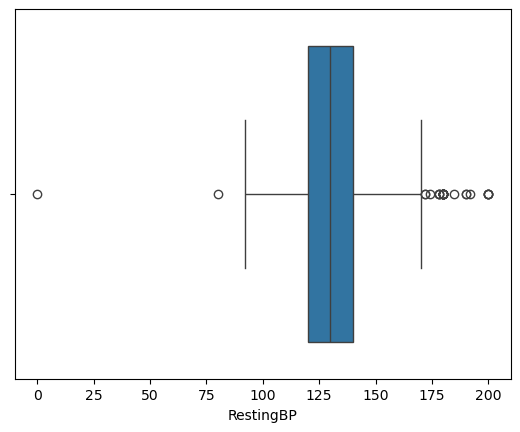

In [69]:
sns.boxplot(x=df.RestingBP)

### CHECKING PERCENTAGE OF OUTLIER --- WHEN THE OUTLIER VALUE LESS THAN 5 , THEN SHOULD HANDLE OUTLIERS

In [71]:
((918-876)/918)*100

4.57516339869281

In [72]:
df.RestingBP.median()

130.0

In [74]:
df.loc[df.RestingBP>UB_RestingBP,'RestingBP']=130

In [78]:
df.loc[df.RestingBP<LB_RestingBP,'RestingBP']=130

In [81]:
df.loc[df.RestingBP>UB_RestingBP,'RestingBP']

Series([], Name: RestingBP, dtype: int64)

In [83]:
df.loc[df.RestingBP<LB_RestingBP,'RestingBP']

Series([], Name: RestingBP, dtype: int64)

<Axes: xlabel='RestingBP'>

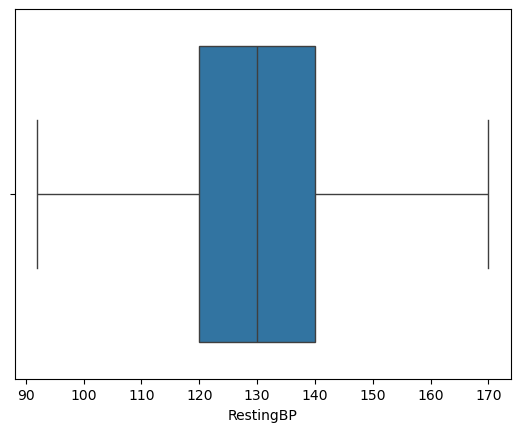

In [85]:
sns.boxplot(x=df.RestingBP)

## Cholesterol

In [88]:
stats.iqr(df.Cholesterol)

93.75

In [90]:
IQR_Cholesterol=stats.iqr(df.Cholesterol)

In [92]:
Q1_Cholesterol = np.percentile(df.Cholesterol,25)
Q3_Cholesterol = np.percentile(df.Cholesterol,75)
print(Q1_Cholesterol)
print(Q3_Cholesterol)

173.25
267.0


In [94]:
Q1_Cholesterol- 1.5*(IQR_Cholesterol)

32.625

In [96]:
Q3_Cholesterol+ 1.5*(IQR_Cholesterol)

407.625

In [98]:
LB_Cholesterol=Q1_Cholesterol- 1.5*(IQR_Cholesterol)
UB_Cholesterol=Q3_Cholesterol+1.5*(IQR_Cholesterol)

In [100]:
df[(df.Cholesterol>LB_Cholesterol) &(df.Cholesterol<UB_Cholesterol)]

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,40,140,289,0,172,0.0,0
1,True,False,False,True,False,False,True,False,False,49,160,180,0,156,1.0,1
2,False,True,False,False,True,True,False,False,True,37,130,283,0,98,0.0,0
3,True,False,True,True,False,False,False,False,False,48,138,214,0,108,1.5,1
4,False,True,False,True,False,False,True,False,True,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,45,110,264,0,132,1.2,1
914,True,False,False,True,False,False,False,False,True,68,144,193,1,141,3.4,1
915,True,False,True,True,False,False,False,False,True,57,130,131,0,115,1.2,1
916,True,False,False,False,False,True,False,False,False,57,130,236,0,174,0.0,1


In [102]:
df.loc[df.Cholesterol>UB_Cholesterol,'Cholesterol']

28     468
30     518
69     412
76     529
103    466
149    603
250    491
496    458
616    564
667    417
796    409
Name: Cholesterol, dtype: int64

In [104]:
df.loc[df.Cholesterol<LB_Cholesterol,'Cholesterol']

293    0
294    0
295    0
296    0
297    0
      ..
514    0
515    0
518    0
535    0
536    0
Name: Cholesterol, Length: 172, dtype: int64

In [106]:
import seaborn as sns

<Axes: xlabel='Cholesterol'>

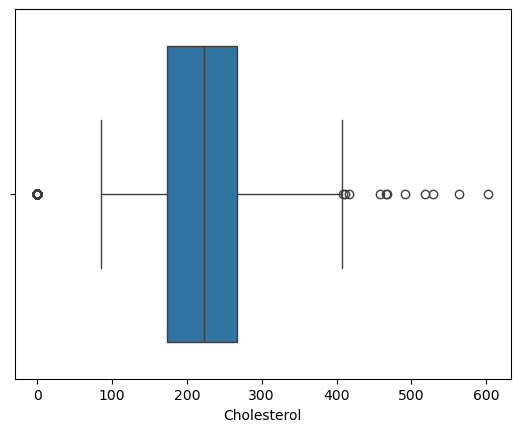

In [108]:
sns.boxplot(x=df.Cholesterol)

In [110]:
#percentage 
((918-735)/918)*100                  #the percentage of outliers is more than 5% so, we don't handle ouliers for Cholesterol

19.934640522875817

## FastingBS

In [113]:
stats.iqr(df.FastingBS)

0.0

In [115]:
IQR_FastingBS=stats.iqr(df.FastingBS)

In [117]:
Q1_FastingBS = np.percentile(df.FastingBS,25)
Q3_FastingBS = np.percentile(df.FastingBS,75)
print(Q1_FastingBS)
print(Q3_FastingBS)

0.0
0.0


In [119]:
Q1_FastingBS- 1.5*(IQR_FastingBS)

0.0

THERE IS NO OUTLIERS FOR FASTINGBS COLUMN

## MaxHR

In [123]:
stats.iqr(df.MaxHR)

36.0

In [125]:
IQR_MaxHR=stats.iqr(df.MaxHR)

In [127]:
Q1_MaxHR = np.percentile(df.MaxHR,25)
Q3_MaxHR = np.percentile(df.MaxHR,75)
print(Q1_MaxHR)
print(Q3_MaxHR)

120.0
156.0


In [129]:
Q1_MaxHR- 1.5*(IQR_MaxHR)

66.0

In [131]:
Q3_MaxHR+ 1.5*(IQR_MaxHR)

210.0

In [133]:
LB_MaxHR=Q1_MaxHR- 1.5*(IQR_MaxHR)
UB_MaxHR=Q3_MaxHR+ 1.5*(IQR_MaxHR)

In [135]:
df[(df.MaxHR>LB_MaxHR) &(df.MaxHR<UB_MaxHR)]

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,40,140,289,0,172,0.0,0
1,True,False,False,True,False,False,True,False,False,49,160,180,0,156,1.0,1
2,False,True,False,False,True,True,False,False,True,37,130,283,0,98,0.0,0
3,True,False,True,True,False,False,False,False,False,48,138,214,0,108,1.5,1
4,False,True,False,True,False,False,True,False,True,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,45,110,264,0,132,1.2,1
914,True,False,False,True,False,False,False,False,True,68,144,193,1,141,3.4,1
915,True,False,True,True,False,False,False,False,True,57,130,131,0,115,1.2,1
916,True,False,False,False,False,True,False,False,False,57,130,236,0,174,0.0,1


In [137]:
df.loc[df.MaxHR>UB_MaxHR,'MaxHR']

Series([], Name: MaxHR, dtype: int64)

In [139]:
df.loc[df.MaxHR<LB_MaxHR,'MaxHR']

370    63
390    60
Name: MaxHR, dtype: int64

<Axes: xlabel='MaxHR'>

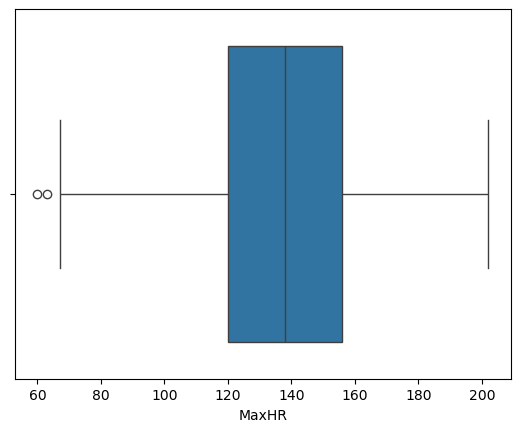

In [141]:
import seaborn as sns
sns.boxplot(x=df.MaxHR)

In [143]:
#percentage 
((918-916)/918)*100

0.2178649237472767

In [145]:
df.MaxHR.median()

138.0

In [147]:
df.loc[df.MaxHR<LB_MaxHR,'MaxHR']=138

In [149]:
df.loc[df.MaxHR<LB_MaxHR,'MaxHR']

Series([], Name: MaxHR, dtype: int64)

<Axes: xlabel='RestingBP'>

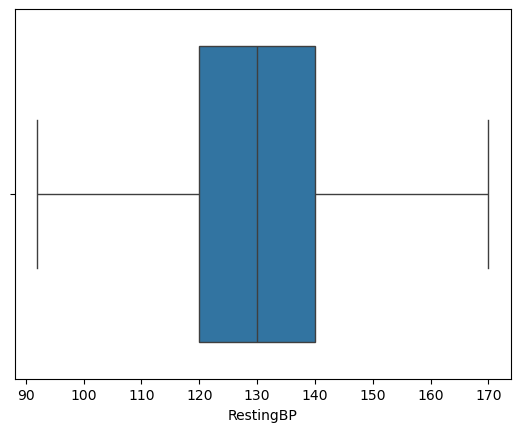

In [151]:
sns.boxplot(x=df.RestingBP)

## HeartDisease

In [154]:
stats.iqr(df.HeartDisease)

1.0

In [156]:
IQR_HeartDisease=stats.iqr(df.HeartDisease)

In [158]:
Q1_HeartDisease= np.percentile(df.HeartDisease,25)
Q3_HeartDisease = np.percentile(df.HeartDisease,75)
print(Q1_HeartDisease)
print(Q3_HeartDisease)

0.0
1.0


In [160]:
Q1_HeartDisease- 1.5*(IQR_HeartDisease)

-1.5

In [162]:
Q3_HeartDisease+1.5*(IQR_HeartDisease)

2.5

In [164]:
LB_HeartDisease=Q1_HeartDisease- 1.5*(IQR_HeartDisease)
UB_HeartDisease=Q3_HeartDisease+1.5*(IQR_HeartDisease)

In [166]:
df[(df.HeartDisease>LB_HeartDisease) &(df.HeartDisease<UB_HeartDisease)]

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,40,140,289,0,172,0.0,0
1,True,False,False,True,False,False,True,False,False,49,160,180,0,156,1.0,1
2,False,True,False,False,True,True,False,False,True,37,130,283,0,98,0.0,0
3,True,False,True,True,False,False,False,False,False,48,138,214,0,108,1.5,1
4,False,True,False,True,False,False,True,False,True,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,45,110,264,0,132,1.2,1
914,True,False,False,True,False,False,False,False,True,68,144,193,1,141,3.4,1
915,True,False,True,True,False,False,False,False,True,57,130,131,0,115,1.2,1
916,True,False,False,False,False,True,False,False,False,57,130,236,0,174,0.0,1


In [168]:
df.loc[df.HeartDisease>UB_HeartDisease,'HeartDisease']

Series([], Name: HeartDisease, dtype: int64)

In [170]:
df.loc[df.HeartDisease<LB_HeartDisease,'HeartDisease']

Series([], Name: HeartDisease, dtype: int64)

## Oldpeak 

In [173]:
stats.iqr(df.Oldpeak)

1.5

In [175]:
IQR_Oldpeak=stats.iqr(df.Oldpeak)

In [177]:
Q1_Oldpeak= np.percentile(df.Oldpeak,25)
Q3_Oldpeak = np.percentile(df.Oldpeak,75)
print(Q1_Oldpeak)
print(Q3_Oldpeak)

0.0
1.5


In [179]:
Q1_Oldpeak- 1.5*(IQR_Oldpeak)

-2.25

In [181]:
Q3_Oldpeak+ 1.5*(IQR_Oldpeak)

3.75

In [183]:
LB_Oldpeak=Q1_Oldpeak- 1.5*(IQR_Oldpeak)
UB_Oldpeak=Q3_Oldpeak+ 1.5*(IQR_Oldpeak)

In [185]:
df[(df.Oldpeak>LB_Oldpeak) &(df.Oldpeak<UB_Oldpeak)]

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,40,140,289,0,172,0.0,0
1,True,False,False,True,False,False,True,False,False,49,160,180,0,156,1.0,1
2,False,True,False,False,True,True,False,False,True,37,130,283,0,98,0.0,0
3,True,False,True,True,False,False,False,False,False,48,138,214,0,108,1.5,1
4,False,True,False,True,False,False,True,False,True,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,45,110,264,0,132,1.2,1
914,True,False,False,True,False,False,False,False,True,68,144,193,1,141,3.4,1
915,True,False,True,True,False,False,False,False,True,57,130,131,0,115,1.2,1
916,True,False,False,False,False,True,False,False,False,57,130,236,0,174,0.0,1


In [187]:
df.loc[df.Oldpeak>UB_Oldpeak,'Oldpeak']

68     4.0
166    5.0
500    4.0
521    4.0
537    4.0
559    4.0
624    4.0
702    4.2
732    4.0
771    5.6
775    3.8
791    4.2
850    6.2
900    4.4
908    4.0
Name: Oldpeak, dtype: float64

In [189]:
df.loc[df.Oldpeak<LB_Oldpeak,'Oldpeak']

324   -2.6
Name: Oldpeak, dtype: float64

<Axes: xlabel='Oldpeak'>

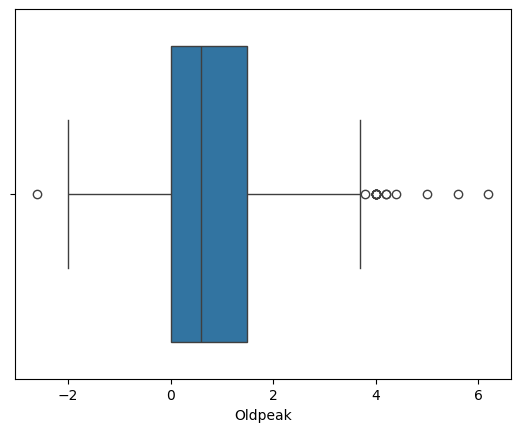

In [191]:
import seaborn as sns
sns.boxplot(x=df.Oldpeak)

In [193]:
#percentage 
((918-902)/918)*100

1.7429193899782136

In [195]:
df.Oldpeak.median()

0.6

In [197]:
df.loc[df.Oldpeak<LB_Oldpeak,'Oldpeak']=0.6

In [199]:
df.loc[df.Oldpeak>UB_Oldpeak,'Oldpeak']=0.6

In [201]:
df.loc[df.Oldpeak<LB_Oldpeak,'Oldpeak']


Series([], Name: Oldpeak, dtype: float64)

In [203]:
df.loc[df.Oldpeak>UB_Oldpeak,'Oldpeak']

Series([], Name: Oldpeak, dtype: float64)

<Axes: xlabel='Oldpeak'>

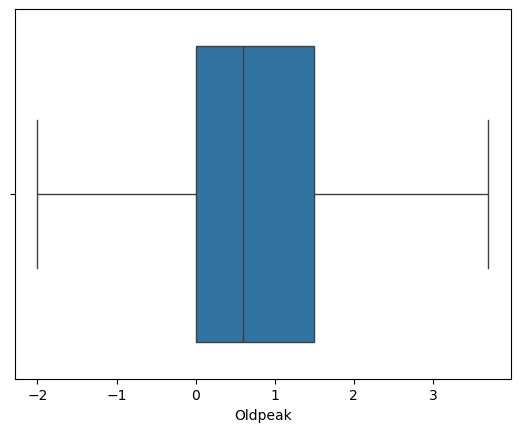

In [205]:
sns.boxplot(x=df.Oldpeak)

## Scaling --- to bring all int values to same scalar

In [208]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
df[['Age','RestingBP','Cholesterol','MaxHR']]=scale.fit_transform(df[['Age','RestingBP','Cholesterol','MaxHR']])

In [210]:
df

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,0.244898,0.615385,0.479270,0,0.777778,0.0,0
1,True,False,False,True,False,False,True,False,False,0.428571,0.871795,0.298507,0,0.659259,1.0,1
2,False,True,False,False,True,True,False,False,True,0.183673,0.487179,0.469320,0,0.229630,0.0,0
3,True,False,True,True,False,False,False,False,False,0.408163,0.589744,0.354892,0,0.303704,1.5,1
4,False,True,False,True,False,False,True,False,True,0.530612,0.743590,0.323383,0,0.407407,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,0.346939,0.230769,0.437811,0,0.481481,1.2,1
914,True,False,False,True,False,False,False,False,True,0.816327,0.666667,0.320066,1,0.548148,3.4,1
915,True,False,True,True,False,False,False,False,True,0.591837,0.487179,0.217247,0,0.355556,1.2,1
916,True,False,False,False,False,True,False,False,False,0.591837,0.487179,0.391376,0,0.792593,0.0,1


In [212]:
## Target and predictor seperation
x=df.iloc[:,:-1]               # x -- input features(independent values)
y=df.HeartDisease              # y -- target column(dependent values)

In [214]:
x

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,False,True,False,True,False,True,False,False,True,0.244898,0.615385,0.479270,0,0.777778,0.0
1,True,False,False,True,False,False,True,False,False,0.428571,0.871795,0.298507,0,0.659259,1.0
2,False,True,False,False,True,True,False,False,True,0.183673,0.487179,0.469320,0,0.229630,0.0
3,True,False,True,True,False,False,False,False,False,0.408163,0.589744,0.354892,0,0.303704,1.5
4,False,True,False,True,False,False,True,False,True,0.530612,0.743590,0.323383,0,0.407407,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,0.346939,0.230769,0.437811,0,0.481481,1.2
914,True,False,False,True,False,False,False,False,True,0.816327,0.666667,0.320066,1,0.548148,3.4
915,True,False,True,True,False,False,False,False,True,0.591837,0.487179,0.217247,0,0.355556,1.2
916,True,False,False,False,False,True,False,False,False,0.591837,0.487179,0.391376,0,0.792593,0.0


In [216]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [218]:
## train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

* if target cloumn datatype, values are finite --- classifer
* if target cloumn datatype, values are infinite continues --- regression

## Model Creation

In [222]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)             # 'fit' is used to train Ml model for a fixed no.of epochs(iterations over the entire dataset)

DecisionTreeClassifier()

## Model Evaluation

In [225]:
from sklearn.metrics import accuracy_score,classification_report
y_pred = model.predict(x_test)
accuracy_score(y_pred,y_test)

0.7663043478260869

In [227]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75        85
           1       0.80      0.76      0.78        99

    accuracy                           0.77       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.77      0.77      0.77       184



## HOW CLASSIFICATION METRICES WORK

                                                    300(0'S AND 1'S)           -- (0--->POSITIVE,1--->NEGATIVE)
                                                     |
                        _________________________________________________________________________________
                        |                                                                                |
                       170 (0'S) ,  (-VE)                                                             130(1'S) , (+VE)
        (MODELPREDICTS) |                                                                                |
                 ____________________                                                              ___________________
                |                    |                                                             |                  |
               150  (0'S)            20 (1'S)                                                     90 (1'S)            140  (0'S) 
            (TRUE POSITIVE (TP))     (FALSE NEGATIVE(FP))                                   (TRUE NEGATIVE(TN))  (FALSE POSITIVE(FP))
       

* CLASSIFICATION METRICES
    
   * Accuracy score = TP+TN/TP+TN+FP+FN
   * Recall = TP/TP+FN
   * Precisiom = TP/TP+FP
   * f1-score = 2*(P*R/P+R)       AND Recall is inversely proposional to precision

[Text(0.5933354878597122, 0.96875, 'x[1] <= 0.5\ngini = 0.492\nsamples = 734\nvalue = [320, 414]'),
 Text(0.39080766636690645, 0.90625, 'x[13] <= 0.619\ngini = 0.291\nsamples = 424\nvalue = [75, 349]'),
 Text(0.49207157711330934, 0.9375, 'True  '),
 Text(0.2204642535971223, 0.84375, 'x[8] <= 0.5\ngini = 0.211\nsamples = 350\nvalue = [42, 308]'),
 Text(0.05755395683453238, 0.78125, 'x[2] <= 0.5\ngini = 0.458\nsamples = 45\nvalue = [16.0, 29.0]'),
 Text(0.02877697841726619, 0.71875, 'x[10] <= 0.538\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.014388489208633094, 0.65625, 'x[13] <= 0.226\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.007194244604316547, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.02158273381294964, 0.59375, 'x[13] <= 0.611\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.014388489208633094, 0.53125, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.02877697841726619, 0.53125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text

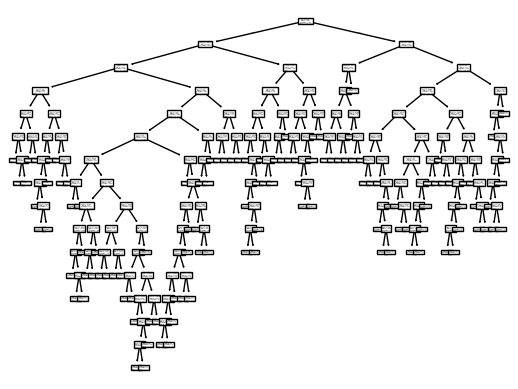

In [232]:
## Tree structure
from sklearn import tree
tree.plot_tree(model)

## TO IMPROVE ACCURACY

In [234]:
y_pred_train=model.predict(x_train)
accuracy_score(y_pred_train,y_train)

1.0

In [235]:
model = DecisionTreeClassifier(max_depth=3)    #we change max_Depth to get generalised model
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [236]:
y_pred=model.predict(x_test)
accuracy_score(y_pred,y_test)

0.8858695652173914

In [237]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        85
           1       0.91      0.87      0.89        99

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



[Text(0.5, 0.875, 'x[1] <= 0.5\ngini = 0.492\nsamples = 734\nvalue = [320, 414]'),
 Text(0.25, 0.625, 'x[13] <= 0.619\ngini = 0.291\nsamples = 424\nvalue = [75, 349]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[8] <= 0.5\ngini = 0.211\nsamples = 350\nvalue = [42, 308]'),
 Text(0.0625, 0.125, 'gini = 0.458\nsamples = 45\nvalue = [16.0, 29.0]'),
 Text(0.1875, 0.125, 'gini = 0.156\nsamples = 305\nvalue = [26, 279]'),
 Text(0.375, 0.375, 'x[6] <= 0.5\ngini = 0.494\nsamples = 74\nvalue = [33, 41]'),
 Text(0.3125, 0.125, 'gini = 0.453\nsamples = 49\nvalue = [17.0, 32.0]'),
 Text(0.4375, 0.125, 'gini = 0.461\nsamples = 25\nvalue = [16, 9]'),
 Text(0.75, 0.625, 'x[11] <= 0.083\ngini = 0.331\nsamples = 310\nvalue = [245, 65]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[12] <= 0.5\ngini = 0.394\nsamples = 37\nvalue = [10, 27]'),
 Text(0.5625, 0.125, 'gini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.87

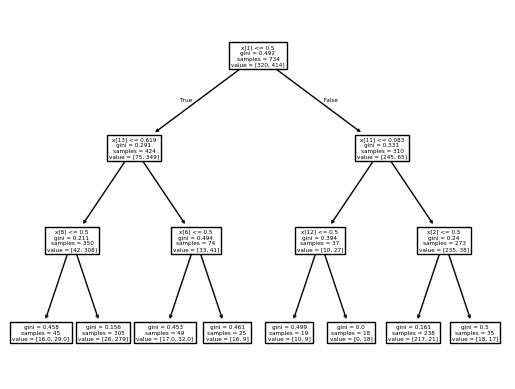

In [238]:
from sklearn import tree
tree.plot_tree(model)

In [239]:
y_pred_train=model.predict(x_train)
accuracy_score(y_pred_train,y_train)

0.8433242506811989

## Feature Selection

which feature is having ,how much importance based on training and target values

In [242]:
import numpy as np
import matplotlib.pyplot as plt

In [243]:
imp=model.feature_importances_
indices = np.argsort(imp)
features = x_train.columns

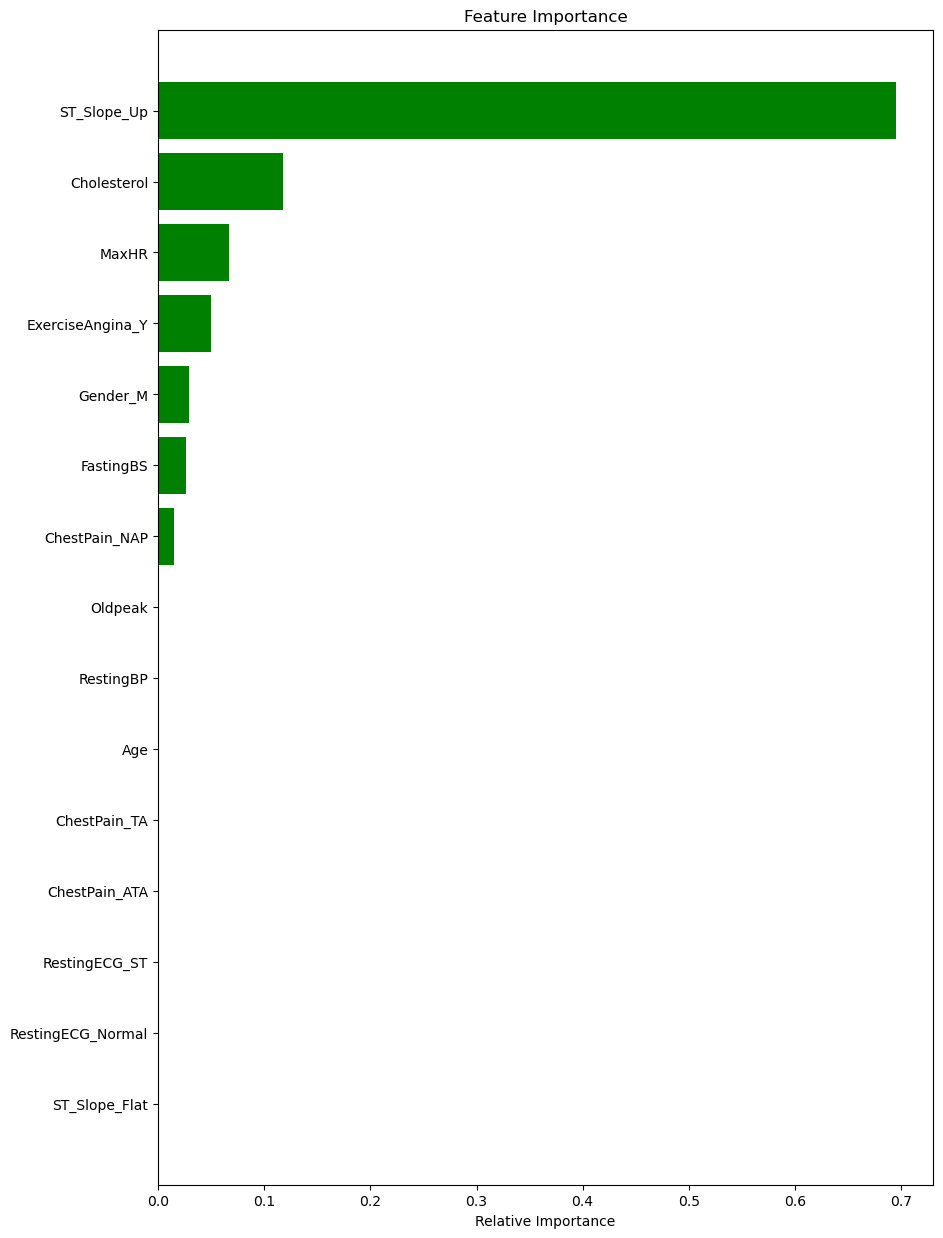

In [244]:
plt.figure(figsize=(10,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)),imp[indices],align='center',color='Green')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Hyperparameter Tuning

* hyperparameter tuning is used to improve accuracy , hyperparameter tuning is having 2 algorithms " RandomizedSearchCV,GridSearchCV"

In [247]:
params = {'max_depth':[3,5,9,10,15],'criterion':['gini','entropy']}

### RandomizedSearchCV

In [249]:
## hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(model, param_distributions=params)
rscv.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 9, 10, 15]})

In [266]:
rscv.best_score_

0.8474140341067933

In [268]:
rscv.best_params_

{'max_depth': 5, 'criterion': 'entropy'}

### GridSearchCV

In [271]:
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(model, param_grid=params)
gscv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 9, 10, 15]})

In [272]:
gscv.best_score_

0.8460441710930947

In [275]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [277]:
model = DecisionTreeClassifier(max_depth=5, criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [279]:
y_pred_train=model.predict(x_train)
accuracy_score(y_pred_train,y_train)

0.8869209809264306

In [296]:
y_pred=model.predict(x_test)
accuracy_score(y_pred,y_test)

0.8532608695652174

In [298]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        81
           1       0.90      0.83      0.86       103

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [300]:
import joblib

In [302]:
#save model
joblib.dump(model, "decision_tree_model.pkl")

['decision_tree_model.pkl']

## Gradio Interface

In [5]:
! pip install gradio

In [6]:
import gradio as gr
import numpy as np

# Prediction function
def predict_heart_disease(ST_Slope_Up,Cholestal,MaxHR,ExerciseAngina_Y,Gender_M,FastingBS,ChestPain_NAP):
    input_data=np.array([[ST_Slope_Up,Cholestal,MaxHR,ExerciseAngina_Y,Gender_M,FastingBS,ChestPain_NAP]])
    prediction=model.predict(input_data)
    return "At Risk" if prediction[0]== i else "Not At Risk"

# Gradio Interface
iface=gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.Slider(0, 1, step=1, label="ST_Slope_Up"),
        gr.Number(label="Cholestal"),
        gr.Number(label="MaxHR"),
        gr.Slider(0,1, step=1, label="ExerciseAngina_Y"),
        gr.Slider(0,1, step=1, label="Gender_M"),
        gr.Slider(0,1, step=1, label="FastingBS"),
        gr.Slider(0,1, step=1, label="ChestPainNAP"),
    ],
    outputs="text",
    title="Heart Disease Risk Predictor"
)
iface.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
